# I] Import and options


In [1]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# # this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [3]:
path = output_file_directory + "ATG7/MEF/Seahorse_results/"

# II] DL data

## A) Extracellular Acidification Rate 

In [4]:
%%time
file_names = "ecar_exp1_df_", "ecar_exp2_df_", "ecar_exp3_df_"
all_conditions = "dmso", "baf"
lvl_studied = '_basal', '_maximum'

ecar_exps = []
#for basal and maximum
for level in lvl_studied:
    #for DMSO and BAF
    for condition in all_conditions:
        #For experiment 1, 2 and 3
        for file_name in file_names: 
            #download data
            path2 = f'/seahorse_ECAR/dataframes_for_input/{file_name}{condition}{level}.csv'
            df_ori = pandas.read_csv(path+path2, sep = ",")
            #create normalized columns and rename
            df = df_ori.assign(EV_dox_ctl= df_ori['Empty Vector +dox']/ df_ori['Empty Vector -dox'],
                               ATG7_1norm= df_ori['ATG7(1)']/ df_ori['Empty Vector +dox'],
                               ATG7_2norm= df_ori['ATG7(2)']/ df_ori['Empty Vector +dox'])
            df['exp'] = file_name.split('_')[1]
            df['condition'] = condition
            df['level studied'] = level.split('_')[1]
            df = df.iloc[:,6:] #select the 3 normalized columns
            df = df.rename(columns = {'EV_dox_ctl' : 'MEF dox control', 
                                      'ATG7_1norm' : 'ATG7(1)',
                                      'ATG7_2norm' : 'ATG7(2)'})
            ecar_exps.append(df)

recap_ecar_dmso_basal = pandas.concat([ecar_exps[0], ecar_exps[1], ecar_exps[2]], axis=0)
recap_ecar_baf_basal = pandas.concat([ecar_exps[3], ecar_exps[4], ecar_exps[5]], axis=0)
recap_ecar_dmso_max = pandas.concat([ecar_exps[6], ecar_exps[7], ecar_exps[8]], axis=0)
recap_ecar_baf_max = pandas.concat([ecar_exps[9], ecar_exps[10], ecar_exps[11]], axis=0)

print(recap_ecar_dmso_basal, '\n', recap_ecar_baf_basal)

   MEF dox control   ATG7(1)   ATG7(2)   exp condition level studied
0         1.197148  1.124737  0.671338  exp1      dmso         basal
1         1.164276  1.151766  0.684698  exp1      dmso         basal
2         1.149506  1.187117  0.686094  exp1      dmso         basal
3         1.147743  1.190476  0.681004  exp1      dmso         basal
4         1.158994  1.193995  0.691301  exp1      dmso         basal
5         1.152470  1.190217  0.682195  exp1      dmso         basal
0         1.146895  1.258428  0.819705  exp2      dmso         basal
1         1.119424  1.248947  0.796392  exp2      dmso         basal
2         1.124024  1.223493  0.789679  exp2      dmso         basal
3         1.122111  1.220170  0.777635  exp2      dmso         basal
4         1.143979  1.221801  0.760836  exp2      dmso         basal
5         1.101544  1.232638  0.782700  exp2      dmso         basal
0         1.055452  1.131286  0.597451  exp3      dmso         basal
1         1.049467  1.159819  0.59

### 1) Basal level rate

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


the pvalue between no dox and dox with DMSO is 4.043E-02 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, DMSO is 1.614E-07


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


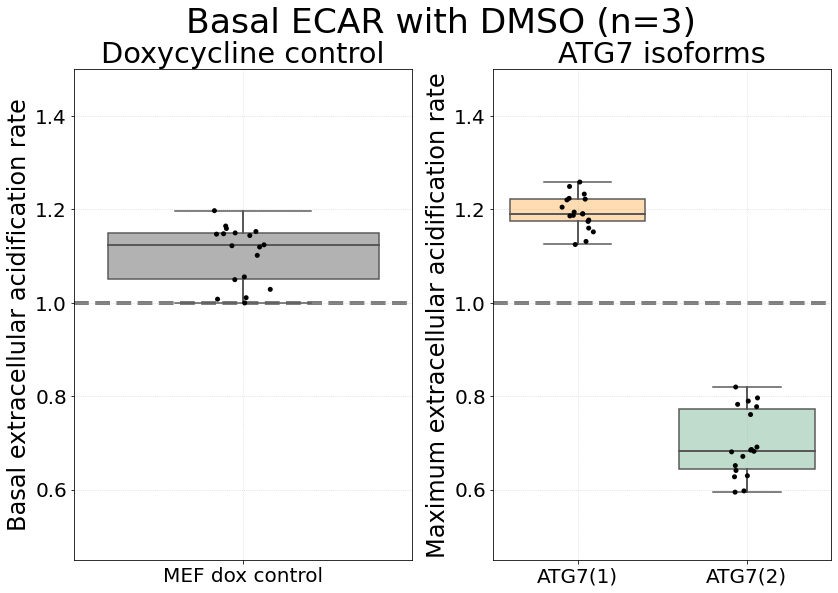

the pvalue between no dox and dox with BAF is 4.043E-02 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, BAF is 1.614E-07


<Figure size 864x576 with 0 Axes>

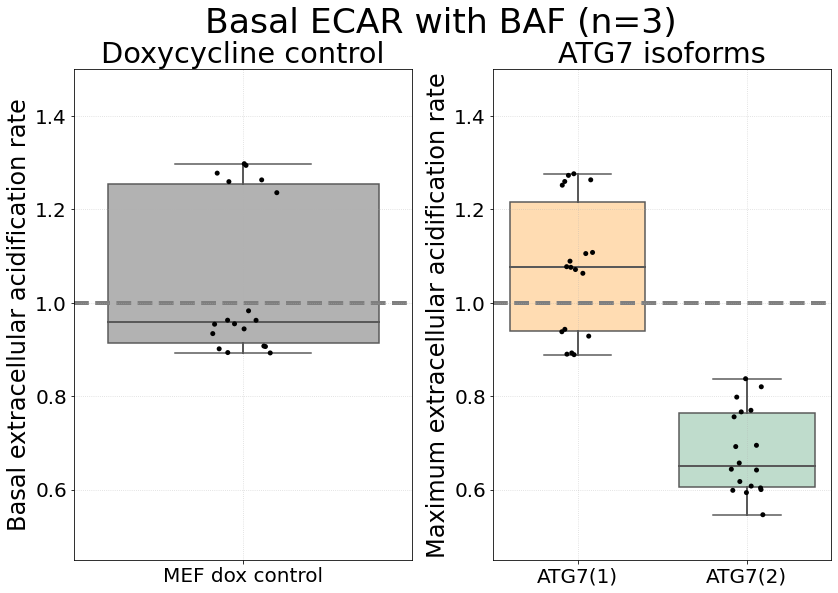

<Figure size 864x576 with 0 Axes>

In [5]:
# BASAL LEVEL RATE
dfs = recap_ecar_dmso_basal, recap_ecar_baf_basal
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Basal ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    fig.set_title("Doxycycline control")
    fig.set_xlabel('')
    fig.set_ylabel('Basal extracellular acidification rate')

    # Select which box you want to change    
    box_nodox = fig.artists[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.5)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
    fig.set_title("ATG7 isoforms")
    fig.set_xlabel('')
    fig.set_ylabel('Maximum extracellular acidification rate')

    # Select which box you want to change    
    box_iso1 = fig.artists[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.artists[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.5)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_basal_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

### 2) Maximal level rate

the pvalue between no dox and dox with DMSO is 4.043E-02 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, DMSO is 2.061E-04


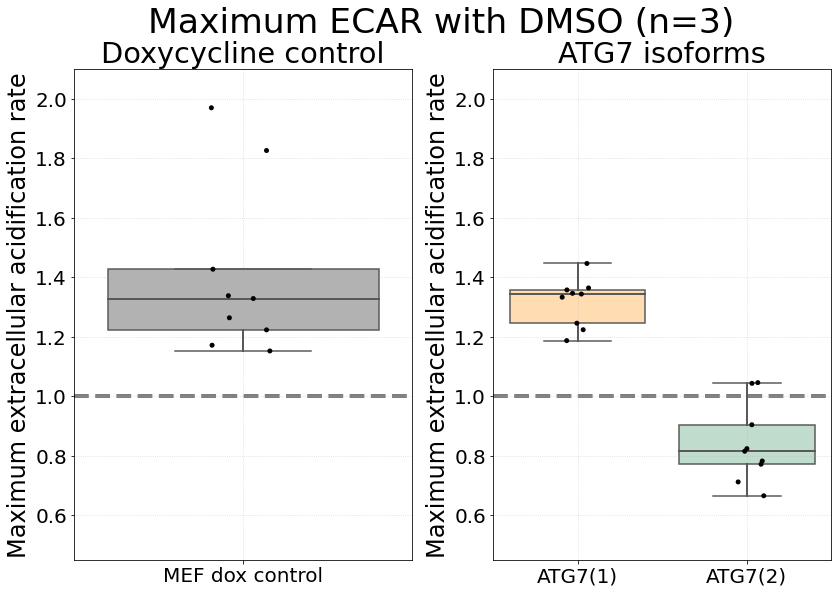

the pvalue between no dox and dox with BAF is 4.043E-02 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, BAF is 2.061E-04


<Figure size 864x576 with 0 Axes>

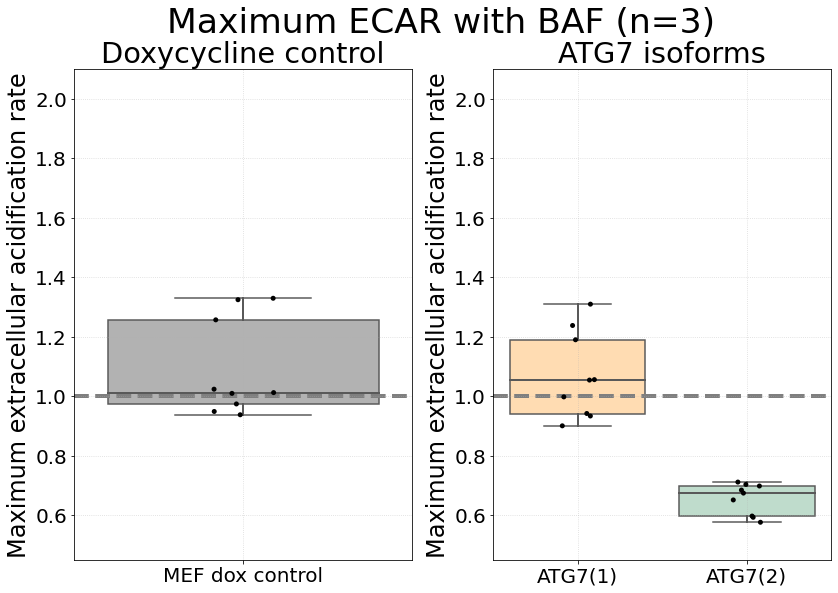

<Figure size 864x576 with 0 Axes>

In [6]:
# BASAL LEVEL RATE
dfs = recap_ecar_dmso_max, recap_ecar_baf_max
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Maximum ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    fig.set_title("Doxycycline control")
    fig.set_xlabel('')
    fig.set_ylabel('Maximum extracellular acidification rate')

    # Select which box you want to change    
    box_nodox = fig.artists[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
    fig.set_title("ATG7 isoforms")
    fig.set_xlabel('')
    fig.set_ylabel('Maximum extracellular acidification rate')

    # Select which box you want to change    
    box_iso1 = fig.artists[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.artists[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_maximum_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

## B) Oxygen Consumption Rate 

In [7]:
df

,MEF dox control,ATG7(1),ATG7(2),exp,condition,level studied
0,1.023740,1.189939,0.711381,exp1,baf,maximum
1,1.009665,1.237981,0.698163,exp1,baf,maximum
2,0.974126,1.309724,0.703404,exp1,baf,maximum
0,1.012290,0.997847,0.576276,exp2,baf,maximum
1,0.948806,1.055864,0.597071,exp2,baf,maximum
2,0.937743,1.054395,0.592903,exp2,baf,maximum
0,1.256930,0.933618,0.651319,exp3,baf,maximum
1,1.329504,0.941970,0.684557,exp3,baf,maximum
2,1.324646,0.900535,0.674361,exp3,baf,maximum


In [8]:
%%time
file_names = "ocr_exp2_df_", "ocr_exp7_df_", "ocr_exp12_df_", "ocr_exp13_df_"
all_conditions = "dmso", "baf"
lvl_studied = '_basal', '_maximum'

ocr_exps = []
#for basal and maximum
for level in lvl_studied:
    #for DMSO and BAF
    for condition in all_conditions:
        #For experiment 1, 2 and 3
        for file_name in file_names: 
            #download data
            path2 = f'seahorse_OCR/dataframes_for_input/{file_name}{condition}{level}.csv'
            df_ori = pandas.read_csv(path+path2, sep = ",")
            #create normalized columns and rename
            df = df_ori.assign(EV_dox_ctl= df_ori['Empty Vector +dox']/ df_ori['Empty Vector -dox'],
                               ATG7_1norm= df_ori['ATG7(1)']/ df_ori['Empty Vector +dox'],
                               ATG7_2norm= df_ori['ATG7(2)']/ df_ori['Empty Vector +dox'])
            df['exp'] = file_name.split('_')[1]
            df['condition'] = condition
            df['level studied'] = level.split('_')[1]
            df = df.iloc[:,5:] #select the 3 normalized columns
            df = df.rename(columns = {'EV_dox_ctl' : 'MEF dox control', 
                                      'ATG7_1norm' : 'ATG7(1)',
                                      'ATG7_2norm' : 'ATG7(2)'})
            ocr_exps.append(df)

#basal level in experiment 12 is not good. Not stable, go down. I remove it
recap_ocr_dmso_basal = pandas.concat([ocr_exps[0], ocr_exps[1], ocr_exps[3]], axis=0)
recap_ocr_baf_basal = pandas.concat([ocr_exps[4], ocr_exps[5], ocr_exps[7]], axis=0)
recap_ocr_dmso_max = pandas.concat([ocr_exps[8], ocr_exps[9], ocr_exps[10], ocr_exps[11]], axis=0)
recap_ocr_baf_max = pandas.concat([ocr_exps[12], ocr_exps[13], ocr_exps[14], ocr_exps[15]], axis=0)

print(recap_ocr_dmso_basal, '\n', recap_ocr_baf_basal)

   MEF dox control   ATG7(1)   ATG7(2)    exp condition level studied
0         0.666695  1.458469  1.494814   exp2      dmso         basal
1         0.678680  1.486579  1.504491   exp2      dmso         basal
2         0.679001  1.494178  1.513714   exp2      dmso         basal
3         0.678113  1.494656  1.509662   exp2      dmso         basal
4         0.679087  1.494944  1.502106   exp2      dmso         basal
5         0.676222  1.490811  1.499106   exp2      dmso         basal
0         1.329883  1.108199  0.502076   exp7      dmso         basal
1         1.262581  1.149208  0.553143   exp7      dmso         basal
2         1.245307  1.133166  0.573492   exp7      dmso         basal
3         1.206674  1.145803  0.579330   exp7      dmso         basal
4         1.168701  1.144112  0.586895   exp7      dmso         basal
5         1.149549  1.199558  0.617820   exp7      dmso         basal
0         0.889392  1.306731  0.927185  exp13      dmso         basal
1         0.916289  

### 1) Basal level rate

the pvalue between no dox and dox with DMSO is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, DMSO is 4.233E-02


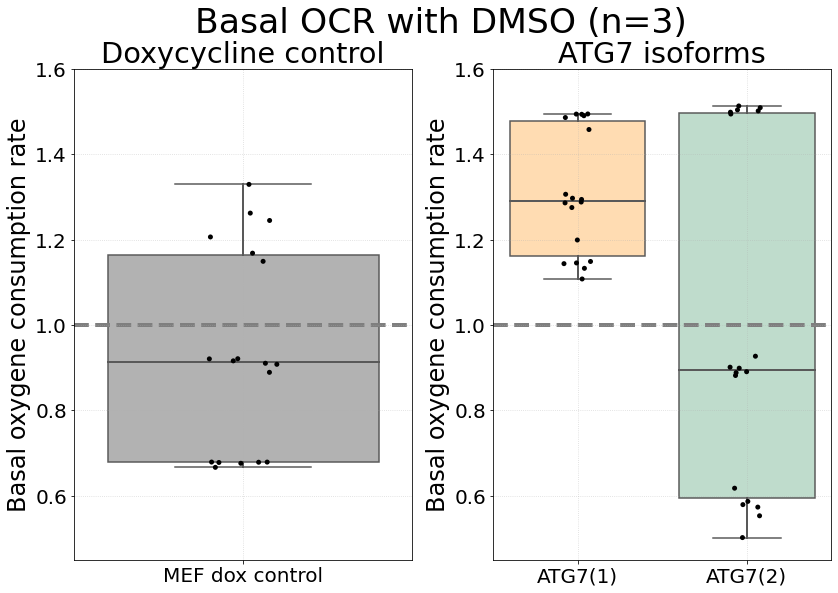

the pvalue between no dox and dox with BAF is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, BAF is 1.588E-05


<Figure size 864x576 with 0 Axes>

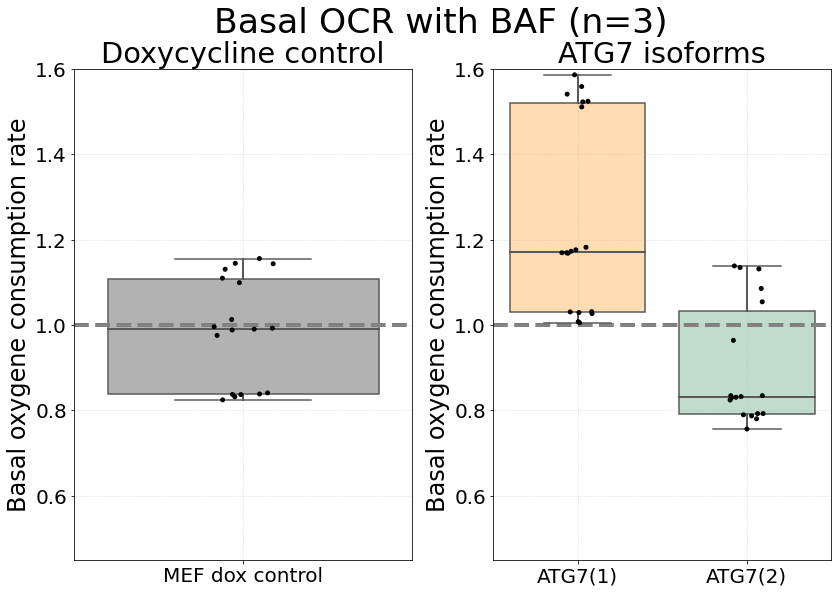

<Figure size 864x576 with 0 Axes>

In [9]:
# BASAL LEVEL RATE
dfs = recap_ocr_dmso_basal, recap_ocr_baf_basal
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Basal OCR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    fig.set_title("Doxycycline control")
    fig.set_xlabel('')
    fig.set_ylabel('Basal oxygene consumption rate')

    # Select which box you want to change    
    box_nodox = fig.artists[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.6)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
    fig.set_title("ATG7 isoforms")
    fig.set_xlabel('')
    fig.set_ylabel('Basal oxygene consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.artists[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.artists[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.6)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_basal_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

### 2) Maximal level rate

the pvalue between no dox and dox with DMSO is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, DMSO is 5.097E-03


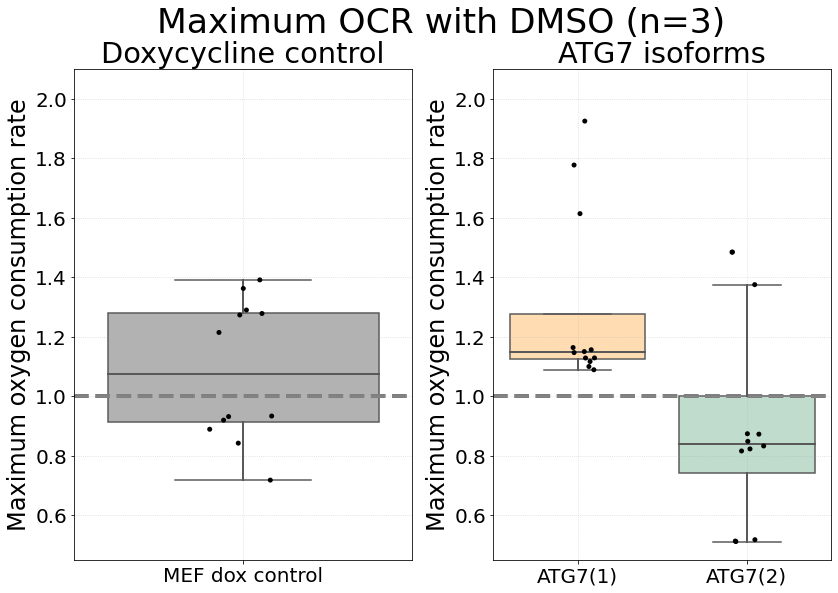

the pvalue between no dox and dox with BAF is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, BAF is 1.829E-05


<Figure size 864x576 with 0 Axes>

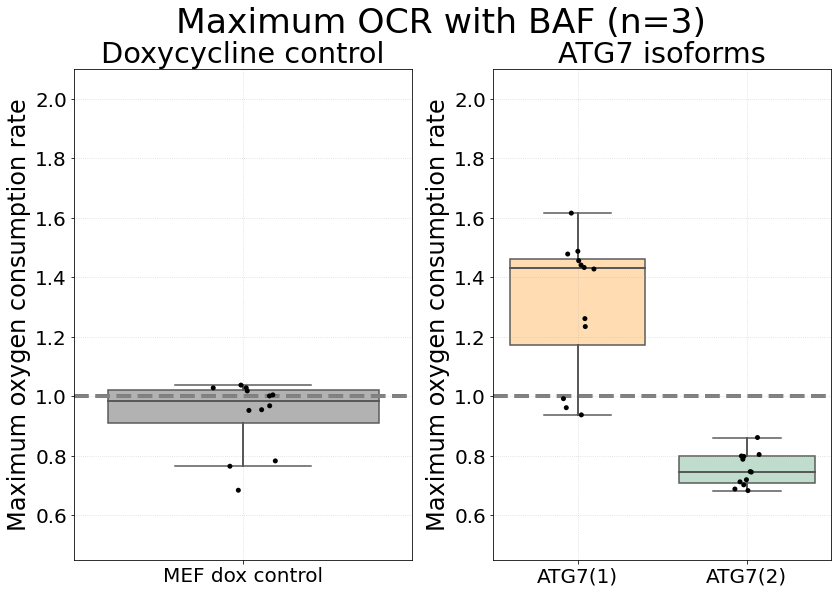

<Figure size 864x576 with 0 Axes>

In [10]:
# BASAL LEVEL RATE
dfs = recap_ocr_dmso_max, recap_ocr_baf_max
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Maximum OCR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    fig.set_title("Doxycycline control")
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_nodox = fig.artists[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
    fig.set_title("ATG7 isoforms")
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.artists[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.artists[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_maximum_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()